<a href="https://colab.research.google.com/github/plue1011/ObjectDetection/blob/master/confirm_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# データセットのダウンロード

In [0]:
import six.moves.urllib as urllib
import os

In [0]:
# https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/RoadDamageDataset.tar.gzに書き換える必要あり

In [6]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')

if not os.path.exists('./RoadDamageDataset.tar.gz'):
    url_base = 'https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/RoadDamageDataset.tar.gz'
    urllib.request.urlretrieve(url_base, './RoadDamageDataset.tar.gz')
    
    print("Download RoadDamageDataset.tar.gz Done")
    
else:
    print("You have RoadDamageDataset.tar.gz")

Download RoadDamageDataset.tar.gz Done


In [0]:
# this procces may take a few minutes
!tar -zxf ./RoadDamageDataset.tar.gz

# データの確認

In [0]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [0]:
base_path = os.getcwd() + '/RoadDamageDataset/'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs corresponds to municipality name.
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]

RoadDamageDataset/"city_name"/"Annotations"  
xmlファイルにjpegの情報が入っている
* jpegの名前
* jpegサイズ
    * 縦サイズ
    * 横サイズ
* ダメージの種類
* bndboxの矩形の座標


In [13]:
# the number of total images and total labels.
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：9053
# of labels：15457


## 写真の確認

In [0]:
import cv2
import random

In [0]:
# 写真とひびの矩形を描画する関数
def draw_images(image_file):
    gov = image_file.split('_')[0]
    img = cv2.imread(base_path + gov + '/JPEGImages/' + image_file.split('.')[0] + '.jpg')
    
    infile_xml = open(base_path + gov + '/Annotations/' +image_file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

Numazu_20170906153627.xml
Sumida_20170913154755.xml
Numazu_20170906141347.xml
Nagakute_20170911093634.xml
Muroran_20170915151435.xml
Numazu_20170907132850.xml
Sumida_20170915143907.xml
Adachi_20170911105401.xml


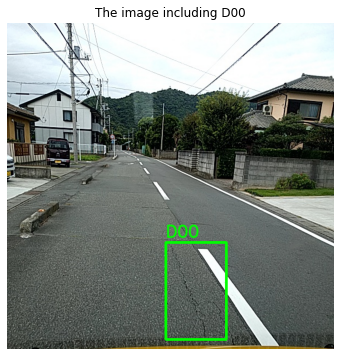

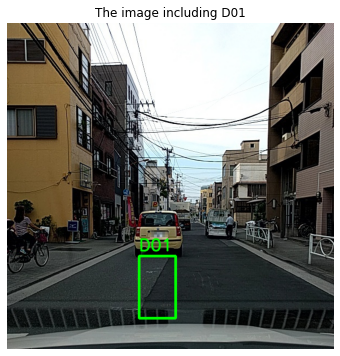

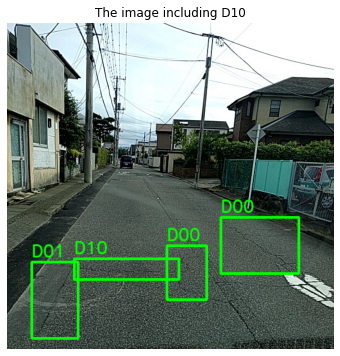

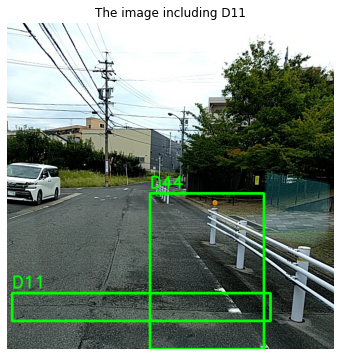

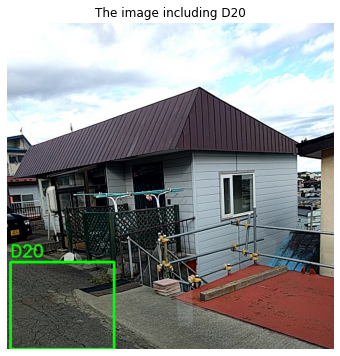

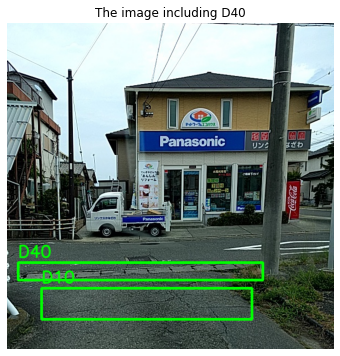

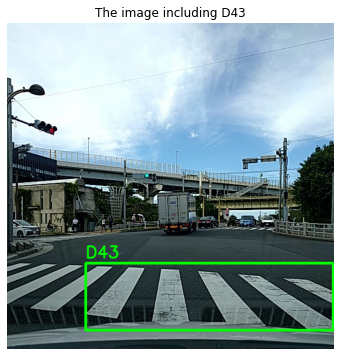

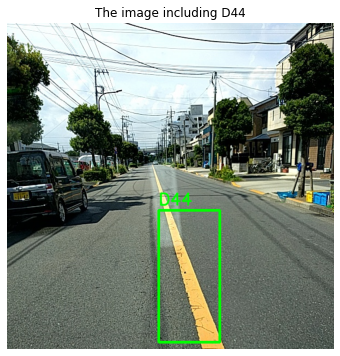

In [35]:
for damageType in damageTypes:
    tmp = []
    for gov in govs:
        file = open(base_path + gov + '/ImageSets/Main/%s_trainval.txt' %damageType, 'r')

        for line in file:
            line = line.rstrip('\n').split('/')[-1]

            if line.split(' ')[2] == '1':
                tmp.append(line.split(' ')[0]+'.xml')
        
    random.shuffle(tmp)
    fig = plt.figure(figsize=(6,6))
    for number, image in enumerate(tmp[0:1]):
        print(image)
        img = draw_images(image)
        plt.subplot(1,1,number+1)
        plt.axis('off')
        plt.title('The image including ' + damageType)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# アノテーション作成

In [40]:
!sudo apt-get install pyqt5-dev-tools
!sudo pip3 install -r requirements/requirements-linux-python3.txt
# !make qt5py3
# !python3 labelImg.py
# !python3 labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pyqt5-dev-tools is already the newest version (5.10.1+dfsg-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements/requirements-linux-python3.txt'
